# Using Inbuilt Naive Bayes Classifier

In [8]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [9]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [10]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category

#change the path of dataset as required
X  =[] 
Y = []
for category in os.listdir("Downloads/Datasets"):
    for document in os.listdir("Downloads/Datasets/"+category):
        with open("Downloads/Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [12]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [13]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [15]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [16]:
#Example for showing re.split
sample_text="Hey! I am Anshika. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Anshika', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [17]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15249,
 'cantaloupe': 19512,
 'srv': 24240,
 'cmu': 39283,
 'edu': 123087,
 'rochester': 3619,
 'udel': 3206,
 'bogus': 1026,
 'sura': 2732,
 'net': 19037,
 'darwin': 1779,
 'zaphod': 6210,
 'mps': 6891,
 'ohio': 11860,
 'state': 14075,
 'utexas': 3199,
 'bcm': 31,
 'newsfeed': 35,
 'rice': 319,
 'lamar': 29,
 'lumensa': 3,
 'newsgroups': 15299,
 'sci': 6405,
 'med': 1299,
 'subject': 16155,
 'precocious': 3,
 'puberty': 5,
 'message': 16494,
 'date': 15585,
 'apr': 15358,
 'organization': 14889,
 'university': 7471,
 'beaumont': 4,
 'lines': 15609,
 'looking': 1400,
 'network': 1490,
 'access': 2169,
 'recent': 398,
 'research': 1681,
 'treatments': 64,
 'know': 6899,
 'specifics': 48,
 'appreciate': 349,
 'email': 1382,
 'plenty': 170,
 'general': 1406,
 'textbook': 17,
 'type': 966,
 'references': 9652,
 'niece': 4,
 'whose': 431,
 'daughter': 105,
 'afflicted': 6,
 'mother': 371,
 'done': 1346,
 'rather': 1488,
 'exhaustive': 20,
 'search': 338,
 'printed': 130,
 'material

In [18]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123087),
 ('cmu', 39283),
 ('com', 37523),
 ('news', 25650),
 ('not', 25277),
 ('srv', 24240),
 ('cantaloupe', 19512),
 ('net', 19037),
 ('message', 16494),
 ('subject', 16155),
 ('lines', 15609),
 ('date', 15585),
 ('apr', 15358),
 ('newsgroups', 15299),
 ('path', 15249),
 ('can', 14991),
 ('organization', 14889),
 ('state', 14075),
 ('gmt', 13324),
 ('one', 11883),
 ('ohio', 11860),
 ('will', 11669),
 ('writes', 11025),
 ('article', 10056),
 ('references', 9652),
 ('comp', 9647),
 ('talk', 9188),
 ('misc', 8867),
 ('sender', 8319),
 ('ans', 8292),
 ('howland', 8225),
 ('reston', 8199),
 ('don', 7988),
 ('people', 7912),
 ('like', 7704),
 ('just', 7527),
 ('university', 7471),
 ('posting', 7316),
 ('nntp', 7047),
 ('know', 6899),
 ('mps', 6891),
 ('host', 6687),
 ('get', 6498),
 ('sci', 6405),
 ('usenet', 6236),
 ('think', 6219),
 ('zaphod', 6210),
 ('may', 6140),
 ('alt', 5925),
 ('politics', 5917),
 ('also', 5747),
 ('windows', 5707),
 ('rutgers', 5428),
 ('time', 5371),
 (

In [19]:
import matplotlib.pyplot as plt

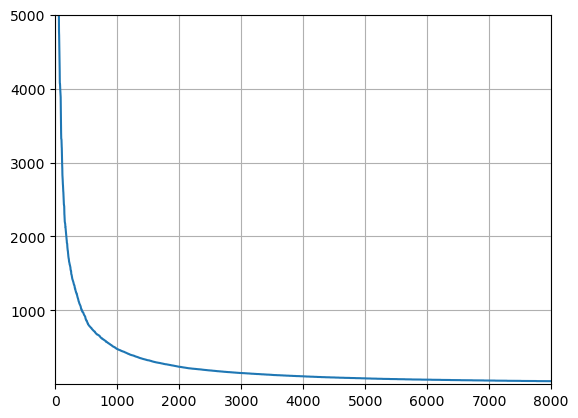

In [20]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [21]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'one',
 'ohio',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'sender',
 'ans',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'get',
 'sci',
 'usenet',
 'think',
 'zaphod',
 'may',
 'alt',
 'politics',
 'also',
 'windows',
 'rutgers',
 'time',
 'harvard',
 'use',
 'near',
 'eng',
 'new',
 'rec',
 'well',
 'soc',
 'good',
 'system',
 'crabapple',
 'noc',
 'sei',
 'das',
 'xref',
 'now',
 'even',
 'cis',
 'see',
 'europa',
 'religion',
 'gtefsd',
 'ece',
 'god',
 'uunet',
 'way',
 'first',
 'world',
 'two',
 'make',
 'say',
 'org',
 'christian',
 'many',
 'much',
 'right',
 'gov',
 'rochester',
 'distribution',
 'club',
 'said',
 'mail',
 'space',
 'andrew',
 'gatech',
 'want',
 'anyone',
 'ibm',

In [26]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [28]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [29]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 8  1  0 ...  0  0  0]
 [ 8  3  2 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]
 ...
 [ 3  3  7 ...  0  0  0]
 [ 5  2  0 ...  0  0  0]
 [ 7  4 14 ...  0  0  0]]
--------------------------
[[ 5  1  6 ...  0  0  0]
 [ 7  4  4 ...  0  0  0]
 [19  4  2 ...  0  0  0]
 ...
 [ 5  3  6 ...  0  0  0]
 [ 6  3  5 ...  0  0  0]
 [ 4  1  0 ...  0  0  0]]


In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [33]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on training data: 0.8935120357404814
Score on testing data: 0.8562
[[198   0   0   0   0   1   1   1   3   0   0   0   1   0   1   1   0   3
    0  44]
 [  0 188  11  10  11   9   6   1   0   0   0   0   3   1   0   0   0   0
    0   0]
 [  0   4 204   8   5  18   1   0   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   2   5 206  39   0   4   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   2   1  16 230   1   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  18  24   5   8 185   4   0   1   0   0   0   1   1   1   0   0   0
    0   0]
 [  0   1   1   4   1   0 234   6   2   0   0   0   3   0   1   0   0   0
    0   0]
 [  0   0   0   1   0   0   8 222  11   0   0   0   5   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   0   4   6 249   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   1   0   0   2   5 221  10   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1   0   8 238   0   1   0   1   0   0   0
   

# Self Implementation of Naive Baye's

In [34]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [35]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [36]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [37]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [38]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [39]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [40]:
dictionary

{'total_doc': 14997,
 'talk.politics.guns': {'edu': 7591,
  'cmu': 2519,
  'com': 2885,
  'news': 1420,
  'not': 1532,
  'srv': 1386,
  'cantaloupe': 1029,
  'net': 842,
  'message': 818,
  'subject': 820,
  'lines': 787,
  'date': 806,
  'apr': 812,
  'newsgroups': 781,
  'path': 773,
  'can': 680,
  'organization': 774,
  'state': 1217,
  'gmt': 699,
  'one': 663,
  'ohio': 905,
  'will': 681,
  'writes': 751,
  'article': 727,
  'references': 652,
  'comp': 2,
  'talk': 1376,
  'misc': 279,
  'sender': 366,
  'ans': 445,
  'howland': 440,
  'reston': 441,
  'don': 574,
  'people': 823,
  'like': 487,
  'just': 467,
  'university': 373,
  'posting': 421,
  'nntp': 407,
  'know': 336,
  'mps': 497,
  'host': 388,
  'get': 410,
  'sci': 3,
  'usenet': 549,
  'think': 429,
  'zaphod': 431,
  'may': 189,
  'alt': 444,
  'politics': 1378,
  'also': 272,
  'windows': 11,
  'rutgers': 13,
  'time': 347,
  'harvard': 160,
  'use': 319,
  'near': 195,
  'eng': 387,
  'new': 153,
  'rec': 29,


In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [42]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Score on testing_data: 0.8716
[[208   1   0   0   0   0   2   0   2   0   0   0   1   1   1   1   0   1
    0  36]
 [  1 192   7   9  11   7   7   0   0   0   0   1   4   1   0   0   0   0
    0   0]
 [  0   7 191  14   2  25   2   0   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   1   2 217  34   0   5   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   4   0  14 234   0   1   0   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  0  13  28   5   3 192   2   1   1   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   0   0   4   3   0 236   6   0   0   0   0   2   1   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   8 226   5   0   0   0   7   1   0   0   1   0
    0   0]
 [  0   1   0   0   0   0   4   4 251   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 234   4   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   1   8 241   0   1   0   0   0   0   0
    0   0]
 [  0   1   0   0   1   0   0   0  

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.86 on testing_data,whereas self implemented classifier gave 0.87 on testing data,which is very close.

